In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("student_data.csv")

In [3]:
 
print(df.to_string)
df.replace("<bound method DataFrame.to_string of ", " ", inplace=True) 

<bound method DataFrame.to_string of     student_id  attendance_pct  internal_test1  internal_test2  \
0         S001       70.083105        8.022289       23.753135   
1         S002       72.926035       15.003125       17.935821   
2         S003       84.715328       18.026218       20.384483   
3         S004       97.845448       18.234903       18.150899   
4         S005       71.487699       15.749673       18.262015   
..         ...             ...             ...             ...   
395       S396       67.962365       23.265764       21.761899   
396       S397       41.907535       14.241779       19.921449   
397       S398       95.308086       21.407503       22.209960   
398       S399       73.281902       18.141592       20.895657   
399       S400       93.567245       18.148781       25.000000   

     assignments_avg  participation  prev_sem_gpa  risk_label  
0          10.781755              4      7.814835           1  
1          12.711783              3      8

,student_id,attendance_pct,internal_test1,internal_test2,assignments_avg,participation,prev_sem_gpa,risk_label
0,S001,70.083105,8.022289,23.753135,10.781755,4,7.814835,1
1,S002,72.926035,15.003125,17.935821,12.711783,3,8.761433,0
2,S003,84.715328,18.026218,20.384483,14.366893,2,6.825737,0
3,S004,97.845448,18.234903,18.150899,15.629894,3,5.905674,0
4,S005,71.487699,15.749673,18.262015,14.146580,3,10.000000,0
...,...,...,...,...,...,...,...,...
395,S396,67.962365,23.265764,21.761899,10.970808,4,7.392929,0
396,S397,41.907535,14.241779,19.921449,11.893097,3,8.579322,1
397,S398,95.308086,21.407503,22.209960,20.000000,5,8.393501,0
398,S399,73.281902,18.141592,20.895657,14.062381,1,8.770205,0


In [4]:
import matplotlib.pyplot as plt

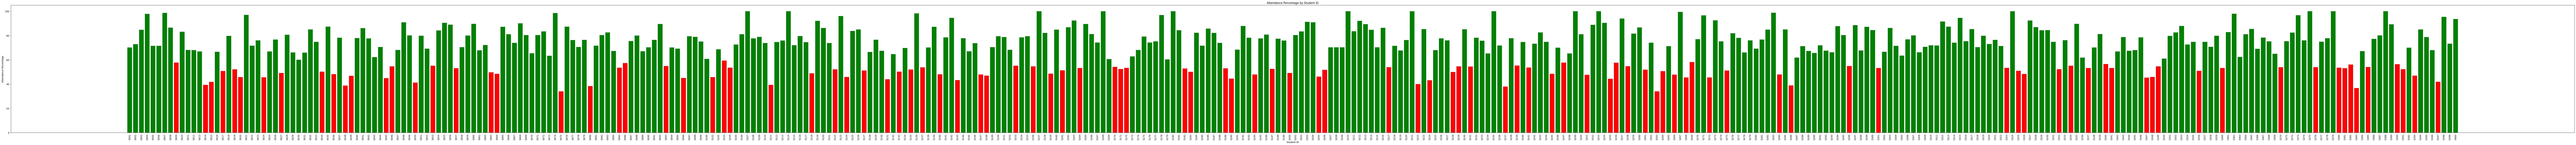

In [5]:
plt.figure(figsize=(200, 10))
colors = ['red' if attendance_pct < 60 else 'green' for attendance_pct in df['attendance_pct']]
plt.bar(df['student_id'], df['attendance_pct'], color=colors)
plt.xlabel('Student ID')
plt.ylabel('Attendance Percentage')
plt.title('Attendance Percentage by Student ID')
plt.xticks(rotation=90)
plt.show()

In [6]:
from pyparsing import col
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier  # Changed
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
import pandas as pd

X = df.drop(['student_id', 'risk_label'], axis=1)
y = df['risk_label']
print("Data balance:", df['risk_label'].value_counts(normalize=True))  # Check 1

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(max_depth=4, random_state=42)  # Fixed model
model.fit(X_train, y_train)
print("Classification Report:\n", classification_report(y_test, model.predict(X_test)))

# Test good student
attendance=float(input("Enter attendance percentage: "))
test1=int(input("Enter test 1 score (1-20): "))
test2=int(input("Enter test 2 score (1-20): "))
assignments=float(input("Enter average assignments score (0-100)%: "))
participation=int(input("Enter participation score (1-5): "))
prev_gpa=float(input("Enter previous semester GPA (0-10): "))
print("Added student:",attendance, test1, test2, assignments, participation, prev_gpa)
new_student = pd.DataFrame([[attendance, test1, test2, assignments, participation, prev_gpa]], columns=['attendance_pct', 'internal_test1', 'internal_test2', 'assignments_avg', 'participation', 'prev_sem_gpa'])  # attendance, test1, test2, assignments, participation, prev_gpa
pred = model.predict(scaler.transform(new_student))
print("Good student:", "✅ SAFE" if pred[0] == 0 else "🚨 AT RISK")

# Feature importance
features = X.columns
importance = pd.DataFrame({'feature': features, 'importance': model.feature_importances_}).sort_values('importance')
print("\nTop predictors:\n", importance)

# Save
import joblib
joblib.dump(model, 'risk_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
print("✅ FIXED & SAVED!")


Data balance: risk_label
0    0.59
1    0.41
Name: proportion, dtype: float64
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        46
           1       1.00      1.00      1.00        34

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

Added student: 74.5 15 9 65.3 3 6.0
Good student: ✅ SAFE

Top predictors:
            feature  importance
2   internal_test2    0.000000
4    participation    0.000000
5     prev_sem_gpa    0.000000
3  assignments_avg    0.087466
1   internal_test1    0.257818
0   attendance_pct    0.654716
✅ FIXED & SAVED!
